In [2]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
## Adding Noise, with Noise intensity handled by noise_factor
noise_factor = 0.2
x_train_noisy = x_train + noise_factor*tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min = 0., clip_value_max = 1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min = 0., clip_value_max = 1.)

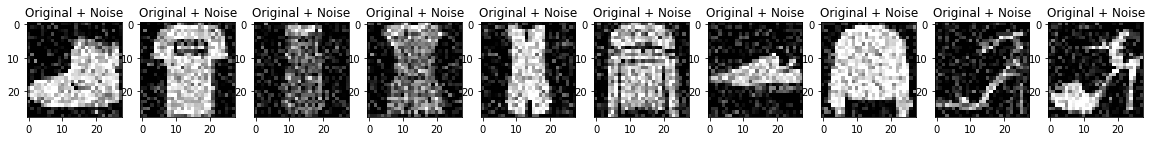

In [6]:
n = 10
plt.figure(figsize=(20,2))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(tf.squeeze(x_train_noisy[i]))
    plt.title('Original + Noise')
    plt.gray()
plt.show()

In [7]:
class Conv_AutoEncoder(Model):
    def __init__(self):
        super(Conv_AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides = 2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same',),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
conv_autoencoder = Conv_AutoEncoder()
conv_autoencoder.compile(loss=losses.MeanSquaredError(), optimizer = 'adam')

In [8]:
conv_autoencoder.fit(x_train_noisy, x_train, epochs=10, validation_data = (x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 246s 131ms/step - loss: 0.0173 - val_loss: 0.0099
Epoch 2/10
1875/1875 [==============================] - 260s 139ms/step - loss: 0.0091 - val_loss: 0.0086
Epoch 3/10
1875/1875 [==============================] - 215s 114ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 4/10
1875/1875 [==============================] - 220s 117ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 218s 116ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 6/10
1875/1875 [==============================] - 227s 121ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/10
1875/1875 [==============================] - 227s 121ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 8/10
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 9/10
1875/1875 [==============================] - 240s 128ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/10
1875/1875 [=======================

In [10]:
conv_encoded_images = conv_autoencoder.encoder(x_test_noisy).numpy()
conv_decoded_images = conv_autoencoder.decoder(conv_encoded_images).numpy()

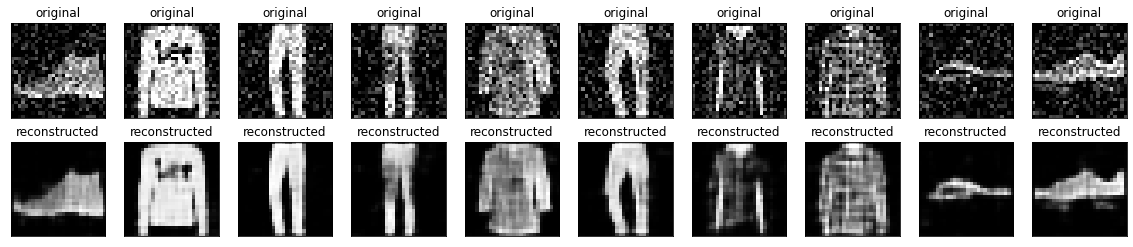

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(conv_decoded_images[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()